<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/CART/higgs_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here 


In [ ]:
#delete
pip install kaggle

In [ ]:
#delete
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
#delete
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#delete
!rm -r dsps/higgsb
!mkdir dsps/higgsb



In [ ]:
cd dsps/higgsb/


/content/drive/My Drive/dsps/higgsb


In [ ]:
!pwd

/content/drive/My Drive/dsps/higgsb


In [ ]:
!kaggle competitions download -c higgs-boson

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 42.2MB/s]
 53% 9.00M/16.9M [00:00<00:00, 15.8MB/s]
100% 16.9M/16.9M [00:00<00:00, 24.6MB/s]
 72% 25.0M/34.8M [00:00<00:00, 45.8MB/s]
100% 34.8M/34.8M [00:00<00:00, 70.5MB/s]
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 448kB/s]


In [ ]:
!unzip test.zip 
!unzip training.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [ ]:
data = pd.read_csv("training.csv")


In [ ]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b



- Split the provided training data into a training and a test set. For each model calculate and discuss the training and test score results.

 the last 2 columns are what you want to predict: "weight" and "label"



In [ ]:
labels = data[["Label"]]
ranks = data[["Weight"]]



In [ ]:
# leave
from sklearn.model_selection import train_test_split 

In [ ]:
traindata, testdata, train_label, test_label = train_test_split(data[data.columns[:-2]],
                                labels, train_size=0.75, test_size=0.25, random_state=1)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from pprint import pprint

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
gbt = GradientBoostingClassifier(random_state = 0)

In [ ]:
rf.fit(traindata, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
gbt.fit(traindata, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

scores and evaluation of overtraining

In [ ]:
rf.score(traindata, train_label), rf.score(testdata, test_label)

(0.9876, 0.822688)

In [ ]:
gbt.score(traindata, train_label), gbt.score(testdata, test_label), 

(0.8343306666666667, 0.83176)

- Produce a confusion matrix for each model and compare them


 



In [ ]:

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    pl.imshow(cm, cmap=cmap)
    pl.xticks([0,1], labels=["N", "P"])
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    pl.colorbar()
    #pl.axis('off')

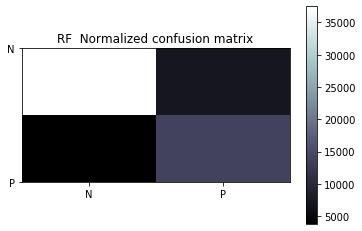

In [ ]:

plot_confusion_matrix(rf.predict(testdata), 
                      test_label,
                      title="RF ")

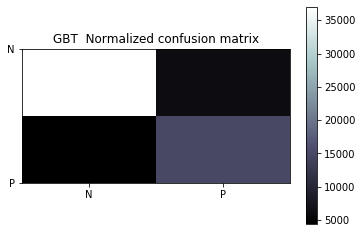

In [ ]:
plot_confusion_matrix(gbt.predict(testdata), 
                      test_label,
                      title="GBT ")


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata2, testdata2, train_ranks, test_ranks = train_test_split(data[data.columns[:-2]],
                                ranks, train_size=0.75, test_size=0.25, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rf2.fit(traindata2, train_ranks)  
print(rf2.feature_importances_)
#[0.14205973 0.76664038 0.0282433  0.06305659]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.         0.         0.34215861 0.         0.05211875 0.
 0.         0.         0.         0.00629693 0.01768417 0.
 0.         0.         0.02206203 0.         0.         0.
 0.         0.         0.         0.         0.         0.02657102
 0.25540155 0.02136078 0.0158518  0.         0.         0.
 0.24049435]


In [ ]:
rf2.predict(testdata2)

array([1.04164987, 0.93019108, 1.92965986, ..., 0.43503808, 1.97828478,
       2.83394529])

In [ ]:
print("L2 RF", ((rf2.predict(testdata2) - test_ranks.values.flatten())**2).sum())

L2 RF 115851.1851398363


In [ ]:

print("L1 RF", ((np.abs(rf2.predict(testdata2) - test_ranks.values.flatten())).sum()))


L1 RF 63240.20834030329


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 
gbt2 = GradientBoostingRegressor(random_state=0)
gbt2.fit(traindata2, train_ranks)  
print(gbt2.feature_importances_)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.00000000e+00 2.20929684e-02 2.83113809e-01 6.21845735e-02
 5.02468230e-02 1.24937018e-03 1.39243345e-02 7.06434184e-05
 2.50615384e-02 8.18048171e-03 9.74620004e-02 1.06766166e-02
 4.51979764e-02 7.84538352e-04 5.89376984e-02 1.57997041e-03
 0.00000000e+00 5.56802762e-05 1.81916309e-03 0.00000000e+00
 4.04771662e-03 0.00000000e+00 3.25137518e-02 3.12972254e-05
 1.14216455e-01 1.07491121e-03 3.92867486e-03 1.20381165e-03
 0.00000000e+00 0.00000000e+00 1.60345195e-01]


In [ ]:
print("L2 GBT", ((gbt2.predict(testdata2) - test_ranks.values.flatten())**2).sum())

L2 GBT 86124.43658080878


In [ ]:
print("L1 GBT", ((np.abs(gbt2.predict(testdata2) - test_ranks.values.flatten())).sum()))


L1 GBT 53154.297722502015


In [ ]:
print(rf2.score(testdata, test_ranks.values))

0.47328240513797915


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on and explore the parameter space with the sklearn module sklearn.model_selection.RandomizedSearchCV fitting only those 4 features

 



In [ ]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf.predict(testdata)

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [ ]:
best_features = rf.feature_importances_[np.argsort(rf.feature_importances_)[-4:]]

In [ ]:
traindata2.iloc[:, best_features]

,EventId,EventId,EventId,EventId
168601,268601,268601,268601,268601
247644,347644,347644,347644,347644
205247,305247,305247,305247,305247
233035,333035,333035,333035,333035
239886,339886,339886,339886,339886
...,...,...,...,...
229119,329119,329119,329119,329119
5192,105192,105192,105192,105192
208780,308780,308780,308780,308780
229611,329611,329611,329611,329611


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [10,100,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,10,100]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }
pprint(random_grid)


{'max_depth': [3, 10, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=24, cv=5, iid=False)


I am going to run the parameter search on the test set, whcih is a bit smaller, so it will save some time. 

in principle, if my sliptting training and testing was correct (unbiased) it should not matter much

A lareger dataset is always better, but .... this is just an exercise and it is taking long enough to run the searc on the test set.

In [ ]:
from time import time
start = time()
random_search.fit(traindata, train_label)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [ ]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), -1))


RandomizedSearchCV took 8429.09 seconds for -1 candidates parameter settings.


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.620010,0.011173,0.033550,0.001066,10,auto,3,"{'n_estimators': 10, 'max_features': 'auto', '...",0.781617,0.78528,0.77656,0.78144,0.779822,0.780944,0.002828,23
1,5.524141,0.033388,0.097032,0.001697,100,auto,3,"{'n_estimators': 100, 'max_features': 'auto', ...",0.796656,0.79656,0.78728,0.79632,0.792703,0.793904,0.003627,19
2,55.772165,0.359707,0.742803,0.007249,1000,auto,3,"{'n_estimators': 1000, 'max_features': 'auto',...",0.795616,0.79408,0.78200,0.79400,0.790063,0.791152,0.004931,21
3,0.613623,0.004486,0.032670,0.000235,10,sqrt,3,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.781617,0.78528,0.77656,0.78144,0.779822,0.780944,0.002828,23
4,5.629685,0.026196,0.098231,0.000783,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.796656,0.79656,0.78728,0.79632,0.792703,0.793904,0.003627,19
5,55.726369,0.153169,0.759830,0.029758,1000,sqrt,3,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.795616,0.79408,0.78200,0.79400,0.790063,0.791152,0.004931,21
6,1.631864,0.024490,0.041332,0.000679,10,auto,10,"{'n_estimators': 10, 'max_features': 'auto', '...",0.828014,0.82600,0.82504,0.82528,0.824546,0.825776,0.001213,13
7,15.684302,0.255865,0.183148,0.002899,100,auto,10,"{'n_estimators': 100, 'max_features': 'auto', ...",0.831453,0.83128,0.82768,0.83272,0.829826,0.830592,0.001721,11
8,156.304811,0.162370,1.639089,0.041246,1000,auto,10,"{'n_estimators': 1000, 'max_features': 'auto',...",0.831453,0.83120,0.82768,0.83264,0.830626,0.830720,0.001656,9
9,1.641686,0.013423,0.041408,0.000381,10,sqrt,10,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.828014,0.82600,0.82504,0.82528,0.824546,0.825776,0.001213,13


In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

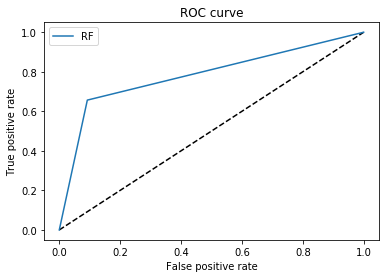

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(testdata))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
test_label

,Label
240208,s
18744,b
207175,b
18669,b
189086,b
...,...
223582,b
61917,s
83156,s
81264,b
